### Geography of Flickr Images Sentiment
This notebook does the following:
- Loads the image data from the PUMA directory specified below
- Uses Microsoft Face API to get estimate emotion of faces
- Performs a spatial join with PUMA shapefile
- Averages sentiment and emotions by PUMA
- Visualize the results

In [1]:
pumaFile = '/home/urwa/Documents/Courses/Sem1/PUI/PUIData/Old Data/PUMA/geo_export_f0519f41-2898-4829-af71-3556b078f017.shp'
imageDirectory = 'pumaImages/'

In [2]:
from __future__ import print_function
import os
import pandas as pd
import geopandas as gpd
from matplotlib import pyplot as plt
import requests 
import json
import numpy as np
import io
import json
import nltk
import shapely
from geopandas.tools import sjoin
from fiona.crs import from_epsg
import time

import requests
from scipy import stats

In [3]:
subscription_key = 'e8bf03012c2a47819145a73df0e0cc4e'
assert subscription_key

In [4]:
face_api_url = 'https://westcentralus.api.cognitive.microsoft.com/face/v1.0/detect'

headers = { 'Content-Type': 'application/octet-stream','Ocp-Apim-Subscription-Key': subscription_key }
    
params = {
    'returnFaceId': 'true',
    'returnFaceLandmarks': 'false',
    'returnFaceAttributes': 'age,gender,smile,facialHair,glasses,emotion,hair,makeup,occlusion,accessories,blur,exposure,noise',
}

In [5]:
def getSentiment(emo):
    return emo['happiness'] - (emo['anger'] + emo['contempt'] + emo['disgust'] + emo['fear'] + emo['sadness'])

In [6]:
def classifyEmotion(emo):
    emotions = emo.keys()
    scores = emo.values()
    return emotions[np.argmax(scores)]

In [7]:
def getDirectorySentiment(directory):
    images = os.listdir(directory)
    print(directory)
    print('images: ',len(images))
    sentList = []
    emoList = []
    for img in images:
        print(img)
        image_url = directory+'/'+img
        data = open(image_url, 'rb').read()
        try :
            response = requests.post(face_api_url, params=params, headers=headers, data=data )
            res = response.json()
            if len(res)>0:
                for r in res:
                    if 'emotion' in r['faceAttributes']:
                        sentList.append(getSentiment(r['faceAttributes']['emotion']))
                        emoList.append(classifyEmotion(r['faceAttributes']['emotion']))
        except Exception as e:
            print(e)
            time.sleep(5)
            #print(res)
        time.sleep(4)
    print('Faces:',len(sentList))
    aggEmo = pd.Series(emoList).value_counts()
    resultDict = dict(zip(aggEmo.index, aggEmo.values))
    resultDict['sentiment'] = np.mean(sentList)  
    with open(directory+'/'+'sentimentData', 'w') as outfile:
        json.dump(resultDict, outfile)
    return resultDict

In [8]:
pumashp = gpd.GeoDataFrame.from_file(pumaFile)
print(pumashp.shape)
pumashp.head(3)

(55, 4)


,puma,shape_area,shape_leng,geometry
0,3701,9.792852e+07,53227.144461,POLYGON ((-73.89641133483133 40.90450452082026...
1,3702,1.889860e+08,106050.002302,"POLYGON ((-73.8442314689986 40.86942035096838,..."
2,3703,2.670137e+08,304071.257466,(POLYGON ((-73.78833349834532 40.8346671297593...


In [9]:
directories = os.listdir(imageDirectory)

In [10]:
pumaSentList = []
for dirr in directories:
    resultDict = getDirectorySentiment(imageDirectory+dirr)
    resultDict['puma'] = dirr
    pumaSentList.append(resultDict)

pumaImages/3804
images:  50
40648420083_e11c7cdc98_c.jpg
33712958778_555e146b94_c.jpg
46594891492_6271fdf862_c.jpg
data
string indices must be integers
46549583455_6032f28f48_c.jpg
46730169294_b2117ccb3e_c.jpg
31705331757_71e7cf6d9d_c.jpg
33285704108_9e4a7c3610_c.jpg
47160856751_c0c65e408f_c.jpg
31731410497_158e9805f6_c.jpg
32950138008_e68789a5bf_c.jpg
47373740731_722f256014_c.jpg
46809436122_d84ea24723_c.jpg
40636275343_1caced1ba4_c.jpg
40238078703_05c68f5854_c.jpg
33203661648_6ebbc02977_c.jpg
33598912188_bc19a1a98c_c.jpg
45935919994_73c5f34f1b_c.jpg
46480661654_d573fa82e7_c.jpg
33285704758_94a5ac460d_c.jpg
46725816944_8c32cce3db_c.jpg
33541274758_98e715bd74_c.jpg
46561380195_ebea4815d2_c.jpg
32609750117_390c91e1ae_c.jpg
sentimentData
string indices must be integers
47137707471_70927916fd_c.jpg
40636210213_03cab944f2_c.jpg
46686856815_b8026a9136_c.jpg
47602603241_702b792a4f_c.jpg
47579570072_c24ed4f338_c.jpg
46728653584_7ba469983e_c.jpg
40636173263_8e7fbbdd62_c.jpg
32142745417_2a5f2ef

47602603241_702b792a4f_c.jpg
47579570072_c24ed4f338_c.jpg
46728653584_7ba469983e_c.jpg
46709316354_7eb8cba2af_c.jpg
40636173263_8e7fbbdd62_c.jpg
32142745417_2a5f2ef11d_c.jpg
46749613574_de9a0308a2_c.jpg
33297863168_cd68020341_c.jpg
47549632542_d51d42392d_c.jpg
46287439625_70694ebfea_c.jpg
33725415568_042fa9719a_c.jpg
33374219948_d79edcb213_c.jpg
40681582343_1ec9e2fb52_c.jpg
32363873917_076e649a45_c.jpg
33376812258_7864de4ce6_c.jpg
46399252395_a4ea021f19_c.jpg
33626303138_7150e7da35_c.jpg
33157308828_9562c0563c_c.jpg
47352504461_15951dae66_c.jpg
47060665742_f1d93429ee_c.jpg
46878440284_12471a7144_c.jpg
40552464423_aba994e5f6_c.jpg
47450980642_e906a7bbd3_c.jpg
47476094591_6828ef99e4_c.jpg
Faces: 58
pumaImages/4010
images:  48
41926023362_07f2e075c1_c.jpg
43890119791_2d8a0b0db5_c.jpg
46090275631_8278111d03_c.jpg
31004743337_a040f8b117_c.jpg
45195921125_ab5f7eec4b_c.jpg
32195722957_846a6e0ec3_c.jpg
data
string indices must be integers
45227587155_fa849dce1a_c.jpg
32516324898_cf2363c4bc_c.j

46354758731_d3c33011a9_c.jpg
46380013254_3496011ca5_c.jpg
46651847994_837b645473_c.jpg
46561380195_ebea4815d2_c.jpg
31677131887_c126cba844_c.jpg
32435009148_41ed14442e_c.jpg
sentimentData
string indices must be integers
46728653584_7ba469983e_c.jpg
32845013848_c6b2526c0c_c.jpg
46709316354_7eb8cba2af_c.jpg
46749613574_de9a0308a2_c.jpg
31956734117_47348a5fcc_c.jpg
46458031331_9ecb2444ca_c.jpg
40648418143_75e88b8d18_c.jpg
33374219948_d79edcb213_c.jpg
32363873917_076e649a45_c.jpg
46399252395_a4ea021f19_c.jpg
31495439317_600730d3b1_c.jpg
32938886338_c47fe39cf3_c.jpg
47060665742_f1d93429ee_c.jpg
47553285281_408cf35253_c.jpg
32390855738_0d2493bb77_c.jpg
46440325181_521abe18ab_c.jpg
Faces: 55
pumaImages/3709
images:  82
41089687280_59b3d9b74c_c.jpg
39418744942_f7b8ec9dc2_c.jpg
31037365977_995bbd96ed_c.jpg
43021455101_675e0a8a07_c.jpg
24935535997_8c29ee8151_c.jpg
data
string indices must be integers
39577244541_5b4b83bd8d_c.jpg
43557536340_2c452efa8e_c.jpg
46730169294_b2117ccb3e_c.jpg
439248510

Faces: 19
pumaImages/4005
images:  32
47609231911_50e214e040_c.jpg
46414886342_a23385a258_c.jpg
47379597502_feb2f339de_c.jpg
46594891492_6271fdf862_c.jpg
32195722957_846a6e0ec3_c.jpg
data
string indices must be integers
32516324898_cf2363c4bc_c.jpg
47224147881_8e2803eefe_c.jpg
40238078703_05c68f5854_c.jpg
47499974382_bace07fd5b_c.jpg
44660098740_e6d8605bf2_c.jpg
32236380397_d6a2ace2f9_c.jpg
47224176561_3c21a68264_c.jpg
46380013254_3496011ca5_c.jpg
46651847994_837b645473_c.jpg
31677131887_c126cba844_c.jpg
sentimentData
string indices must be integers
46728653584_7ba469983e_c.jpg
32845013848_c6b2526c0c_c.jpg
46709316354_7eb8cba2af_c.jpg
46642416544_7dbee49381_c.jpg
45989930734_c74c032676_c.jpg
46749613574_de9a0308a2_c.jpg
31956734117_47348a5fcc_c.jpg
45527769375_5895da8518_c.jpg
40648418143_75e88b8d18_c.jpg
33374219948_d79edcb213_c.jpg
32938886338_c47fe39cf3_c.jpg
45821497414_2044c8d054_c.jpg
47060665742_f1d93429ee_c.jpg
47553285281_408cf35253_c.jpg
40552464423_aba994e5f6_c.jpg
Faces: 33

41936590602_57f662c0ac_c.jpg
25989317972_5e30b54419_c.jpg
22811655855_94c0b6d577_c.jpg
23541499715_7d33357e8e_c.jpg
26849508461_d63d0327a2_c.jpg
42595645551_6ff901fb5d_c.jpg
22337907339_9e26510c42_c.jpg
43803141342_680ffa0228_c.jpg
37553197715_71d6e15ca2_c.jpg
32910281840_27878379c3_c.jpg
42734857610_1b9879158b_c.jpg
31111646662_2e4a813a20_c.jpg
24385315998_8d16804bcc_c.jpg
30877720073_4f2809c740_c.jpg
45121385865_7036720b13_c.jpg
43726608802_303c03d133_c.jpg
28625242553_61e5e5fea1_c.jpg
30402009954_acac9fc72d_c.jpg
36799216822_1df8a465ab_c.jpg
32363873917_076e649a45_c.jpg
42315361534_c253fda3aa_c.jpg
23211946144_ae71dccb35_c.jpg
28957882820_9c492dea33_c.jpg
42459193960_be3c4274f7_c.jpg
41349685754_c212b4ff88_c.jpg
44075846780_74e9fc7898_c.jpg
27408927254_cf7fd65e6c_c.jpg
35575379346_daf78e73f5_c.jpg
42359888400_18a837be24_c.jpg
32485343555_0e7e6f64f1_c.jpg
28820986304_695bf3d792_c.jpg
Faces: 110
pumaImages/4001
images:  50
40648420083_e11c7cdc98_c.jpg
47609231911_50e214e040_c.jpg
3371

string indices must be integers
45619317951_bd64386552_c.jpg
43021458321_d2e191e4d9_c.jpg
30990862867_2bf939ccac_c.jpg
41089670920_fe0e6df788_c.jpg
46478722951_6c666224ec_c.jpg
44439587752_1e821e1db6_c.jpg
31879944298_a6a2228d3e_c.jpg
42527385414_7aa29415de_c.jpg
45117305761_2bb56d50f9_c.jpg
44202316074_3a7f7496c9_c.jpg
42302613444_dbba348111_c.jpg
42042266825_de610740d3_c.jpg
30891969957_8029a65f44_c.jpg
31037365797_b359dcd3ea_c.jpg
46132042101_db3efc75f6_c.jpg
42890616185_f3acca90f5_c.jpg
31253321177_482a214f58_c.jpg
42042284385_bd08deac66_c.jpg
43545056565_ea36a1fd41_c.jpg
44388609435_ebea395997_c.jpg
45913146804_1a7048b0fc_c.jpg
33285704788_a73f086f7b_c.jpg
33626303138_7150e7da35_c.jpg
29921700258_1c7c9caa58_c.jpg
44126435750_601fc70519_c.jpg
41435515820_d83744e1c9_c.jpg
31793856188_3d0c9b333c_c.jpg
44008106245_d13fce821c_c.jpg
31333733008_685a543c50_c.jpg
Faces: 85
pumaImages/3806
images:  47
40648420083_e11c7cdc98_c.jpg
47609231911_50e214e040_c.jpg
33712958778_555e146b94_c.jpg
47

26924565018_0cab8f5ffe_c.jpg
32363873917_076e649a45_c.jpg
42315361534_c253fda3aa_c.jpg
40719278260_c9048ab361_c.jpg
43234070492_edb0b97a07_c.jpg
38889762684_76efe6f199_c.jpg
28944035358_a69c3b388e_c.jpg
44075846780_74e9fc7898_c.jpg
35876837401_59a7a19284_c.jpg
27821044009_c9ea5c6a68_c.jpg
42359888400_18a837be24_c.jpg
38635205940_05cbb8c4c2_c.jpg
24662524648_c08429c219_c.jpg
Faces: 88
pumaImages/4018
images:  28
40001530063_8cdd24827b_c.jpg
33390163328_bdb9c0df57_c.jpg
data
string indices must be integers
47082077882_afbf371a64_c.jpg
31761473687_a0800e61b5_c.jpg
45541434385_3062c40900_c.jpg
46976205031_c9f24defca_c.jpg
32112215267_e8d5a210cc_c.jpg
46481966741_9b5f5cb4e4_c.jpg
32571856928_58e7d7c8cd_c.jpg
31896566517_f173e9352a_c.jpg
47117536462_e39670d88c_c.jpg
sentimentData
string indices must be integers
46454019871_e98dbae7dc_c.jpg
44637051750_3b47a120b6_c.jpg
46512936282_2c8848c26a_c.jpg
46793056872_30c01c0596_c.jpg
33390165418_d1058563f4_c.jpg
32571855478_b96a18a720_c.jpg
400115626

46287439625_70694ebfea_c.jpg
33725415568_042fa9719a_c.jpg
40681582343_1ec9e2fb52_c.jpg
33376812258_7864de4ce6_c.jpg
46399252395_a4ea021f19_c.jpg
33626303138_7150e7da35_c.jpg
33157308828_9562c0563c_c.jpg
47352504461_15951dae66_c.jpg
47060665742_f1d93429ee_c.jpg
46878440284_12471a7144_c.jpg
40552464423_aba994e5f6_c.jpg
47450980642_e906a7bbd3_c.jpg
47476094591_6828ef99e4_c.jpg
Faces: 52
pumaImages/3903
images:  17
31172568637_7b0a10814f_c.jpg
40923144454_6f3770ae09_c.jpg
32056669938_8d13017f4a_c.jpg
45878423532_cab5a11f73_c.jpg
32056691868_f7f8a91c24_c.jpg
data
string indices must be integers
46227275825_e3d7b99ae5_c.jpg
43803695382_5fbf978fb1_c.jpg
45216674854_457d6de6f8_c.jpg
45940859221_7576e7214f_c.jpg
45927776671_5d11f5c1d3_c.jpg
44124544080_679587ea0b_c.jpg
31037127658_0fecb51173_c.jpg
45028565895_814b99855b_c.jpg
43977496305_790f1720c6_c.jpg
30506716337_dc1f9c4dfd_c.jpg
41068899275_f46d414679_c.jpg
Faces: 13
pumaImages/4006
images:  39
47609231911_50e214e040_c.jpg
46090275631_82781

42328752681_aa65ea5d4a_c.jpg
42225282484_fedbc91c41_c.jpg
33285704108_9e4a7c3610_c.jpg
39418747242_695e1fd11d_c.jpg
29921626988_6943f3c089_c.jpg
47160856751_c0c65e408f_c.jpg
30609018638_448b03c7de_c.jpg
27278419837_76ca0a5d89_c.jpg
31731410497_158e9805f6_c.jpg
40515182894_d6ac9da981_c.jpg
40564447690_f25e6c17de_c.jpg
44750333304_eaf16e27ff_c.jpg
40332758725_556be81bdf_c.jpg
41957725202_1f9d3c29d1_c.jpg
28593408888_f6cc4385be_c.jpg
27132776037_fa1b675136_c.jpg
44202255104_3367882a32_c.jpg
40194786180_bd5531836a_c.jpg
41967471300_4e1b7e3a73_c.jpg
39418797732_1c7f697097_c.jpg
43052253754_121a472bb5_c.jpg
33285704758_94a5ac460d_c.jpg
44941590244_1c2179a875_c.jpg
27250163167_d4fcbbcc96_c.jpg
42102436132_7ebe4ea118_c.jpg
43059785564_657dd8d79e_c.jpg
41233600765_835113fc67_c.jpg
40505904863_7c048867f1_c.jpg
24739501737_675f7db9ff_c.jpg
45619317951_bd64386552_c.jpg
40327323660_b1d3492d37_c.jpg
43021458321_d2e191e4d9_c.jpg
40162719942_89fe04cb4a_c.jpg
41089670920_fe0e6df788_c.jpg
46478722951_6c

40152234720_ec812daba6_c.jpg
41307321001_b82b057a1f_c.jpg
39243635110_071b983fd4_c.jpg
43366874172_695c419ce2_c.jpg
40064554765_b40fd819cd_c.jpg
33374219948_d79edcb213_c.jpg
41348349034_4fb6d7f230_c.jpg
44857427834_b489a92cbc_c.jpg
45216622924_12dd03e0b5_c.jpg
28878487278_d84bee3f6b_c.jpg
41958788901_e040ef701a_c.jpg
43590858205_f0fa2d302c_c.jpg
42843265981_c2c2f1f7b3_c.jpg
29105839028_14a98fcb01_c.jpg
28686941857_d660d5557e_c.jpg
45891398452_19e4e535a4_c.jpg
39932191264_245288d403_c.jpg
41349685754_c212b4ff88_c.jpg
44124412050_bb27f20d4c_c.jpg
27180201648_c06f585d8f_c.jpg
32938886338_c47fe39cf3_c.jpg
46026133765_69975be28b_c.jpg
29540005448_5fb7db31bc_c.jpg
29408118527_26288aedbc_c.jpg
44553425704_979caf7a69_c.jpg
Faces: 60
pumaImages/3707
images:  80
41089687280_59b3d9b74c_c.jpg
31037365977_995bbd96ed_c.jpg
43021455101_675e0a8a07_c.jpg
41904102470_7d71e24a91_c.jpg
data
string indices must be integers
41133530070_335e06e6b5_c.jpg
43557536340_2c452efa8e_c.jpg
46730169294_b2117ccb3e_c.j

40451610273_890289a859_c.jpg
47362797312_e217261c68_c.jpg
31481697237_90609e2f70_c.jpg
46485006385_b312005d38_c.jpg
33606953848_296ef7b8f1_c.jpg
47364382162_a9ff7867df_c.jpg
45777765545_4f131c59aa_c.jpg
32604770428_c5396b1251_c.jpg
47529445412_47c080be91_c.jpg
47243478392_b8d244fca5_c.jpg
32363873917_076e649a45_c.jpg
31497442767_30f34b1b87_c.jpg
47364449092_45a7aaa7f5_c.jpg
32519650847_52e973a339_c.jpg
45698375074_d7561a456a_c.jpg
46641082645_10e5ffb4ef_c.jpg
47364448502_d6f22559ea_c.jpg
40234137553_e07c9218ba_c.jpg
32519648007_188215ebd5_c.jpg
44711132980_dee2cedb20_c.jpg
31550178037_cdc628c838_c.jpg
47529433592_ae1827f380_c.jpg
46337131904_20819349b6_c.jpg
32541633747_1cdb79a695_c.jpg
40616344363_3cd31d4e42_c.jpg
45769897704_8e96861457_c.jpg
33345527608_3853e8fa4b_c.jpg
46127604345_eb13299500_c.jpg
46337116804_389dd2e841_c.jpg
46485052595_1fc568e812_c.jpg
Faces: 173
pumaImages/4104
images:  68
47053512871_83c4f0ee97_c.jpg
45571605551_feff7239d0_c.jpg
44917447901_174d38e3f8_c.jpg
4638

In [11]:
len(pumaSentList)

55

In [12]:
pumaSent = pd.DataFrame(pumaSentList)
pumaSent.head(3)

,anger,contempt,disgust,happiness,neutral,puma,sadness,sentiment,surprise
0,NaN,1.0,NaN,32,29.0,3804,2.0,0.432531,NaN
1,NaN,NaN,NaN,6,5.0,4114,NaN,0.479727,NaN
2,NaN,2.0,NaN,64,63.0,3702,2.0,0.459038,NaN


In [13]:
pumasSentGdf = pumashp.merge(pumaSent, on='puma', how='left')

/home/urwa/miniconda3/envs/usa/lib/python2.7/site-packages/pysal/__init__.py:65: VisibleDeprecationWarning: PySAL's API will be changed on 2018-12-31. The last release made with this API is version 1.14.4. A preview of the next API version is provided in the `pysal` 2.0 prelease candidate. The API changes and a guide on how to change imports is provided at https://migrating.pysal.org
  ), VisibleDeprecationWarning)


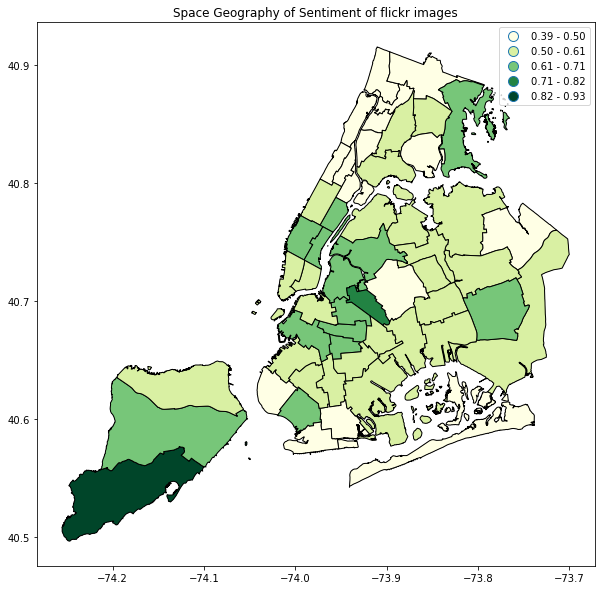

In [14]:
intervals = 10

fig, ax = plt.subplots(figsize=(10, 10))
pumasSentGdf.plot(color="black",ax=ax)
pumasSentGdf.dropna(subset=['sentiment']).plot(column="sentiment", scheme='Equal_Interval', cmap="YlGn",\
                  edgecolor='black',legend=True,ax=ax)
ax.set_title('Space Geography of Sentiment of flickr images')

In [15]:
pumaSent.to_csv('facePumaSent.csv',index=False)

In [153]:
pumaSent.columns = ['puma','faceSent']
pumaSent.puma = pumaSent.puma.astype(int)
pumaText = pd.read_csv('pumaSent.csv')
allSent = pd.merge(pumaSent, pumaText, on='puma', how='inner')
allSent.dropna(inplace=True)
print(allSent.shape)
stats.pearsonr(allSent.sentiment.values, allSent.faceSent.values)

(52, 3)


(0.1209866279751797, 0.39289259695642664)